In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

In [112]:
data = pd.read_csv("letters.csv")
data

,label,pixel43,pixel44,pixel92,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,...,pixel329,pixel351,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417
0,1,0,0,0,0,0,0,0,0,0,...,0,254,0,0,0,0,0,0,0,0
1,0,0,0,0,137,137,192,86,72,1,...,254,0,0,75,254,254,254,17,0,0
2,1,0,0,0,3,141,139,3,0,0,...,0,184,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,94,255,69,0,0,0,0,0
4,0,0,0,0,155,254,254,254,157,30,...,253,0,0,0,223,253,253,253,129,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,2,0,0,1,248,253,176,43,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,128,...,0,0,0,0,255,255,0,0,0,0
41997,2,0,0,0,255,255,191,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,2,0,0,0,255,128,0,0,0,0,...,0,255,0,0,0,0,0,0,0,0


In [113]:
# data.rename(columns = {"pixel43": "43","pixel44":"44",  }, inplace = True)
data.columns = data.columns.str.replace('pixel', '')

In [114]:
data

,label,43,44,92,124,125,126,127,128,129,...,329,351,410,411,412,413,414,415,416,417
0,1,0,0,0,0,0,0,0,0,0,...,0,254,0,0,0,0,0,0,0,0
1,0,0,0,0,137,137,192,86,72,1,...,254,0,0,75,254,254,254,17,0,0
2,1,0,0,0,3,141,139,3,0,0,...,0,184,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,94,255,69,0,0,0,0,0
4,0,0,0,0,155,254,254,254,157,30,...,253,0,0,0,223,253,253,253,129,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,2,0,0,1,248,253,176,43,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,128,...,0,0,0,0,255,255,0,0,0,0
41997,2,0,0,0,255,255,191,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,2,0,0,0,255,128,0,0,0,0,...,0,255,0,0,0,0,0,0,0,0


In [115]:
# data['0']=0
j=1
for i in range(784):
    if i>417:
        data[str(i)]=0
    elif data.columns[j]==str(i):
        j=j+1
    else:
        data.insert(j, str(i), 0)
        j=j+1

In [117]:
data.duplicated().sum() #finding the duplicated values


1633

In [118]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3 , random_state=100)

In [119]:
print(train.shape)
print(test.shape)

(29400, 785)
(12600, 785)


In [120]:
X = train.drop(["label"],axis = 1).values
Y = train["label"].values

In [121]:
x_test = test.drop(["label"],axis = 1).values
y_test = test["label"].values

In [122]:
x_test,y_test

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([0, 7, 9, ..., 3, 5, 1]))

<AxesSubplot:ylabel='Count'>

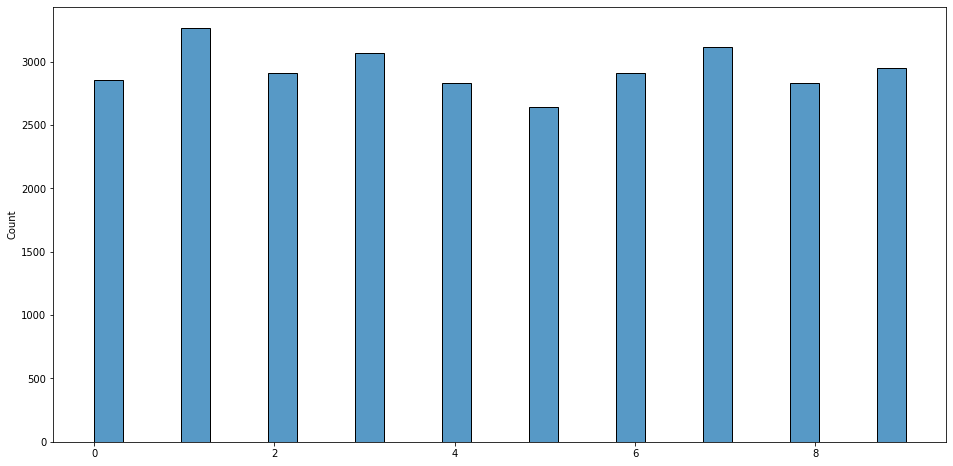

In [47]:
plt.figure(figsize = (16,8))
sns.histplot(Y)

<AxesSubplot:ylabel='Density'>

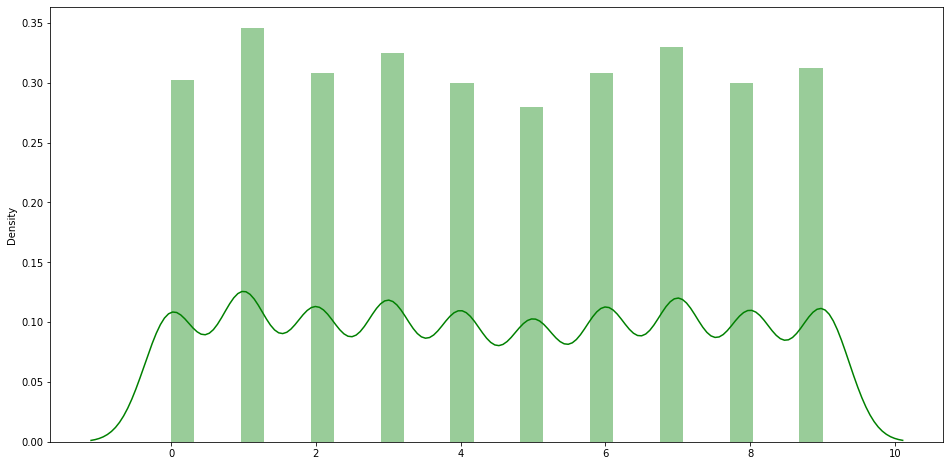

In [123]:
plt.figure(figsize = (16,8))
sns.distplot(Y,color='g')

<AxesSubplot:ylabel='Density'>

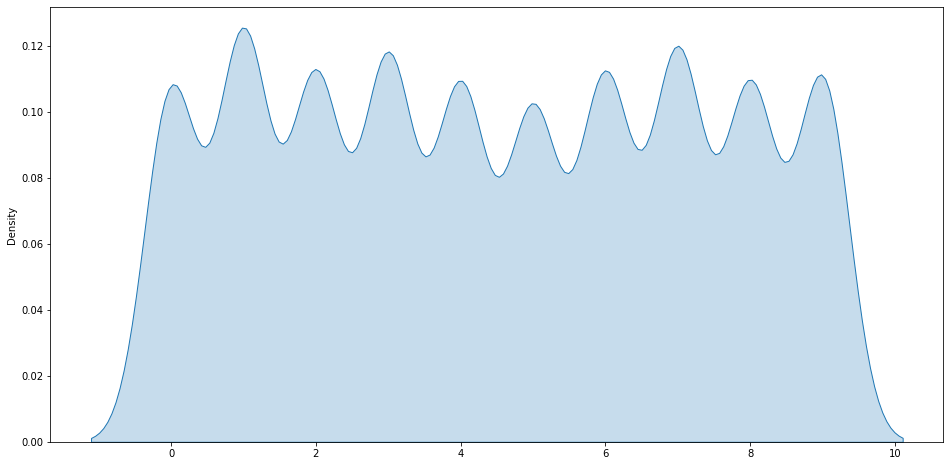

In [124]:
plt.figure(figsize = (16,8))
sns.kdeplot(Y,shade=True)

In [125]:
X = X.reshape([train.shape[0],28,28,1])
Y = Y.reshape([train.shape[0],1])

In [128]:
Y

array([[6],
       [3],
       [5],
       ...,
       [9],
       [5],
       [1]])

In [129]:
x_test = x_test.reshape([test.shape[0],28,28,1])
y_test = y_test.reshape([test.shape[0],1])

In [130]:
from keras.utils.np_utils import to_categorical 
Y = to_categorical(Y, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [131]:
y_test.shape

(12600, 10)

In [132]:
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [133]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])



In [135]:
        
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',        # In loss mae can also be used.
    metrics=['binary_accuracy'],
)

In [183]:
model.compile

<bound method Model.compile of <keras.engine.sequential.Sequential object at 0x14dae6700>>

In [136]:

history = model.fit(X,Y,batch_size=256,epochs=20)


Epoch 1/20


2022-05-21 10:40:22.142918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


115/115 [==============================] - 6s 49ms/step - loss: 0.3574 - binary_accuracy: 0.8969
Epoch 2/20
115/115 [==============================] - 6s 48ms/step - loss: 0.2270 - binary_accuracy: 0.9157
Epoch 3/20
115/115 [==============================] - 6s 48ms/step - loss: 0.1889 - binary_accuracy: 0.9271
Epoch 4/20
115/115 [==============================] - 6s 48ms/step - loss: 0.1745 - binary_accuracy: 0.9325
Epoch 5/20
115/115 [==============================] - 5s 47ms/step - loss: 0.1665 - binary_accuracy: 0.9352
Epoch 6/20
115/115 [==============================] - 5s 47ms/step - loss: 0.1617 - binary_accuracy: 0.9368
Epoch 7/20
115/115 [==============================] - 5s 47ms/step - loss: 0.1575 - binary_accuracy: 0.9386
Epoch 8/20
115/115 [==============================] - 5s 47ms/step - loss: 0.1547 - binary_accuracy: 0.9391
Epoch 9/20
115/115 [==============================] - 6s 52ms/step - loss: 0.1533 - binary_accuracy: 0.9399
Epoch 10/20
115/115 [==================

In [137]:
y_pred = model.predict(x_test)

2022-05-21 10:42:14.761317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [138]:
y_pred.shape

(12600, 10)

In [139]:
model.evaluate(x_test,y_test)

 24/394 [>.............................] - ETA: 1s - loss: 0.1309 - binary_accuracy: 0.9449

2022-05-21 10:42:16.408591: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


394/394 [==============================] - 2s 5ms/step - loss: 0.1367 - binary_accuracy: 0.9439


[0.13665182888507843, 0.9439207315444946]

In [247]:
#plt.y_pred(-0.1, 1.1)
#plot(accuracies)

AttributeError: module 'matplotlib.pyplot' has no attribute 'y_pred'

In [140]:
#

In [184]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [185]:
y_pred = model.predict(x_test)
y_pred


array([[9.99629378e-01, 6.92566076e-08, 3.42610118e-04, ...,
        1.48603488e-06, 7.55050996e-06, 1.17694572e-05],
       [5.60832326e-04, 1.47674982e-05, 1.09737795e-02, ...,
        7.53281236e-01, 2.37226649e-03, 1.35823727e-01],
       [1.98689682e-04, 1.15746014e-04, 3.33076785e-03, ...,
        1.28086433e-01, 5.61848143e-03, 7.95817971e-01],
       ...,
       [1.04893534e-05, 2.70155870e-05, 2.86879065e-03, ...,
        2.33454834e-04, 8.88139755e-03, 1.91026891e-04],
       [1.84521571e-06, 6.08475493e-05, 3.73609873e-05, ...,
        8.36484614e-05, 8.54343642e-04, 8.58392959e-05],
       [3.21734683e-06, 9.96850550e-01, 4.66701822e-05, ...,
        1.85547266e-04, 4.03313083e-04, 2.31528757e-04]], dtype=float32)

In [65]:
print(y_pred>0.5)

[[ True False False ... False False False]
 [False False False ...  True False False]
 [False False False ... False False  True]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False  True False ... False False False]]


<AxesSubplot:>

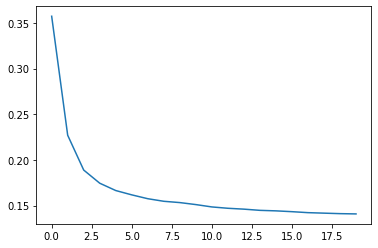

In [143]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot()

In [231]:
#KNN

from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=10)

In [232]:
#converting values into nemric
c = train.drop(["label"],axis = 1).values.astype("int") 
d =train["label"].values.astype("int") 

In [233]:
d

array([6, 3, 5, ..., 9, 5, 1])

In [234]:
X_train, X_test, y_train, y_test  = train_test_split(c,d, test_size=0.30, random_state=3)

In [235]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

cv_method = StratifiedKFold(n_splits=4, shuffle=True, random_state=999)

In [236]:
knn_model.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=10)

In [237]:
y_pred1 = knn_model.predict(X_test)

In [238]:
y_pred1

array([4.4, 5.5, 3.2, ..., 4.8, 7.1, 5. ])

In [242]:
#printing the accuracy values 
from sklearn import metrics
Accuracy = print("Accuracy:",(y_test,y_pred))

Accuracy: (array([6, 5, 3, ..., 8, 7, 5]), array([[9.99629378e-01, 6.92566076e-08, 3.42610118e-04, ...,
        1.48603488e-06, 7.55050996e-06, 1.17694572e-05],
       [5.60832326e-04, 1.47674982e-05, 1.09737795e-02, ...,
        7.53281236e-01, 2.37226649e-03, 1.35823727e-01],
       [1.98689682e-04, 1.15746014e-04, 3.33076785e-03, ...,
        1.28086433e-01, 5.61848143e-03, 7.95817971e-01],
       ...,
       [1.04893534e-05, 2.70155870e-05, 2.86879065e-03, ...,
        2.33454834e-04, 8.88139755e-03, 1.91026891e-04],
       [1.84521571e-06, 6.08475493e-05, 3.73609873e-05, ...,
        8.36484614e-05, 8.54343642e-04, 8.58392959e-05],
       [3.21734683e-06, 9.96850550e-01, 4.66701822e-05, ...,
        1.85547266e-04, 4.03313083e-04, 2.31528757e-04]], dtype=float32))


In [240]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

1.7032393535356265

In [245]:
metrics.accuracy_score(y_test, y_pred1.astype(int))

0.40736961451247167

In [246]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1.astype(int)))

              precision    recall  f1-score   support

           0       0.94      0.68      0.79       828
           1       0.73      0.80      0.76       981
           2       0.44      0.44      0.44       828
           3       0.35      0.33      0.34       927
           4       0.29      0.37      0.32       883
           5       0.27      0.46      0.34       797
           6       0.28      0.46      0.35       864
           7       0.34      0.45      0.39       938
           8       0.23      0.08      0.12       879
           9       1.00      0.00      0.00       895

    accuracy                           0.41      8820
   macro avg       0.49      0.41      0.38      8820
weighted avg       0.49      0.41      0.39      8820

